# **Phase 1**

### **Data Set Up and EDA**

Mounted at /content/drive
Missing values in economic indicators:

GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Spending (Billion USD)          0
dtype: int64

Columns log-transformed: []


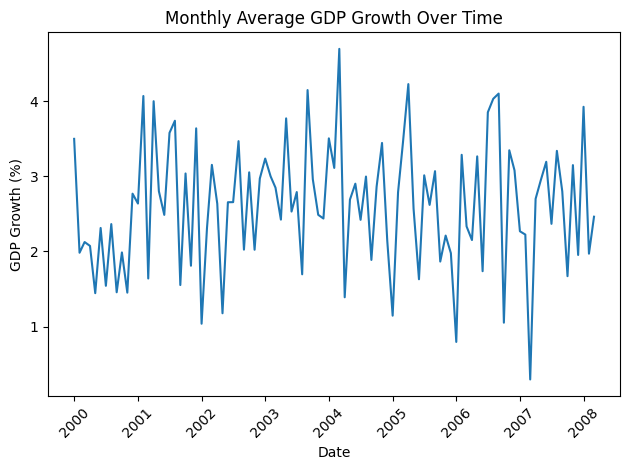

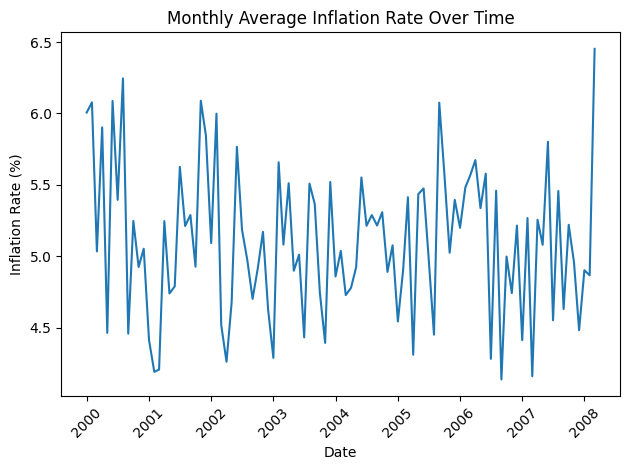

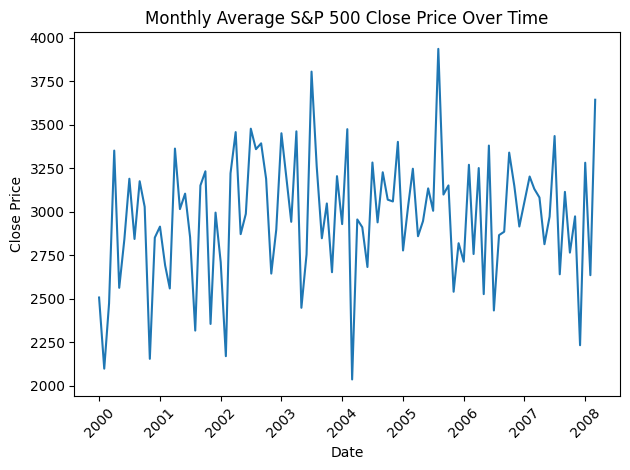

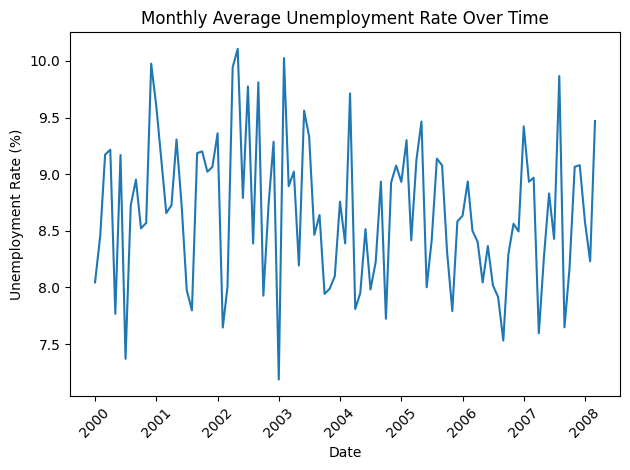

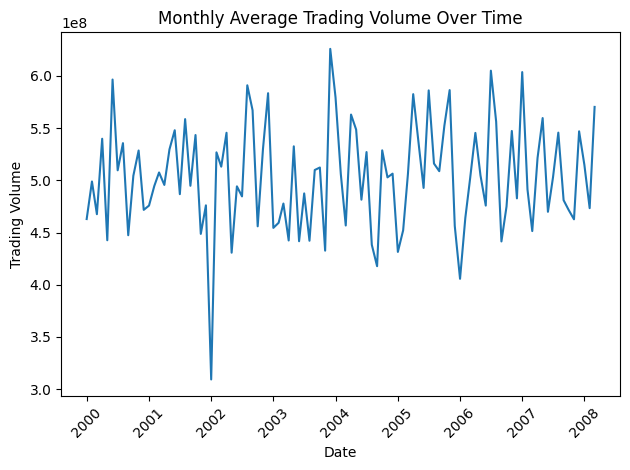

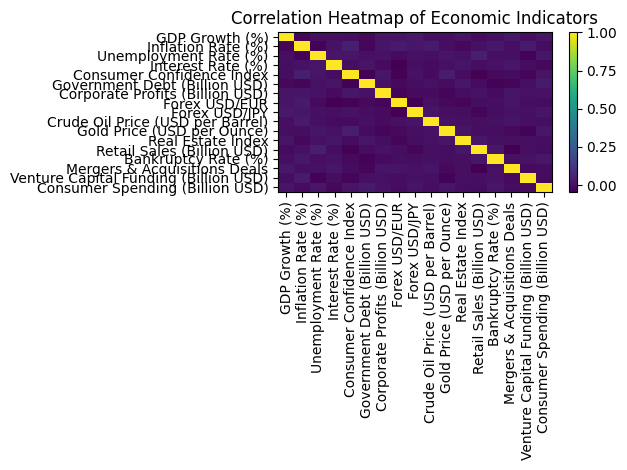

In [2]:


from google.colab import drive
drive.mount('/content/drive')


data_path = '/content/drive/MyDrive/finance_economics_dataset.csv'  # Make sure this matches your file name
df = pd.read_csv(data_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
random.seed(42)


# Convert Date to datetime and sort
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date").reset_index(drop=True)

# Create YearMonth for monthly aggregations
df["YearMonth"] = df["Date"].dt.to_period("M")

# Select economic indicator columns for later PCA
econ_cols = [
    "GDP Growth (%)",
    "Inflation Rate (%)",
    "Unemployment Rate (%)",
    "Interest Rate (%)",
    "Consumer Confidence Index",
    "Government Debt (Billion USD)",
    "Corporate Profits (Billion USD)",
    "Forex USD/EUR",
    "Forex USD/JPY",
    "Crude Oil Price (USD per Barrel)",
    "Gold Price (USD per Ounce)",
    "Real Estate Index",
    "Retail Sales (Billion USD)",
    "Bankruptcy Rate (%)",
    "Mergers & Acquisitions Deals",
    "Venture Capital Funding (Billion USD)",
    "Consumer Spending (Billion USD)",
]

econ_df = df[econ_cols].copy()

# Check for missing values
print("Missing values in economic indicators:\n")
print(econ_df.isna().sum())

# Cap extreme values at the 1st and 99th percentile
for col in econ_cols:
    lower = econ_df[col].quantile(0.01)
    upper = econ_df[col].quantile(0.99)
    econ_df[col] = econ_df[col].clip(lower=lower, upper=upper)

# Identify skewed, strictly positive variables for log transform
log_candidates = []
for col in econ_cols:
    if econ_df[col].min() > 0 and econ_df[col].skew() > 1:
        log_candidates.append(col)

print("\nColumns log-transformed:", log_candidates)

# Apply log transforms
for col in log_candidates:
    econ_df[col] = np.log1p(econ_df[col])

# -----------------------------
# EDA VISUALIZATIONS
# -----------------------------

# FIGURE 1: Monthly Average GDP Growth Over Time
monthly_gdp = df.groupby("YearMonth")["GDP Growth (%)"].mean()

plt.figure()
plt.plot(monthly_gdp.index.to_timestamp(), monthly_gdp.values)
plt.xlabel("Date")
plt.ylabel("GDP Growth (%)")
plt.title("Monthly Average GDP Growth Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FIGURE 2: Monthly Average Inflation Rate Over Time
monthly_inflation = df.groupby("YearMonth")["Inflation Rate (%)"].mean()

plt.figure()
plt.plot(monthly_inflation.index.to_timestamp(), monthly_inflation.values)
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.title("Monthly Average Inflation Rate Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FIGURE 3: Monthly Average S&P 500 Close Price Over Time
sp500 = df[df["Stock Index"] == "S&P 500"].copy()
monthly_sp500 = sp500.groupby("YearMonth")["Close Price"].mean()

plt.figure()
plt.plot(monthly_sp500.index.to_timestamp(), monthly_sp500.values)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Monthly Average S&P 500 Close Price Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FIGURE 4: Monthly Average Unemployment Rate Over Time
monthly_unemp = df.groupby("YearMonth")["Unemployment Rate (%)"].mean()

plt.figure()
plt.plot(monthly_unemp.index.to_timestamp(), monthly_unemp.values)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Monthly Average Unemployment Rate Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FIGURE 5: Monthly Average Trading Volume Over Time
monthly_volume = df.groupby("YearMonth")["Trading Volume"].mean()

plt.figure()
plt.plot(monthly_volume.index.to_timestamp(), monthly_volume.values)
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Monthly Average Trading Volume Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FIGURE 6: Correlation Heatmap of Economic Indicators
corr = econ_df.corr()

plt.figure()
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(econ_cols)), econ_cols, rotation=90)
plt.yticks(range(len(econ_cols)), econ_cols)
plt.title("Correlation Heatmap of Economic Indicators")
plt.tight_layout()
plt.show()





**Data Cleaning**

Before performing PCA, I cleaned and prepared the dataset so the economic indicators were ready for analysis. I first converted the Date column from text into a proper datetime format and sorted the data in order. This ensures that any time-based visualizations are accurate.

Next, I selected only the numeric economic variables for PCA and confirmed that none of these columns contained missing values. Several of the economic indicators had extremely large or unusual values. To prevent these rare extremes from distorting the results, I gently capped the highest and lowest values so they stayed within a more normal range for each variable.

Many of the financial variables measured in billions of dollars were also highly skewed. For variables that were strictly positive and showed strong skew, I applied a log transformation. This helps reduce the impact of very large values and makes the distributions more balanced.

Finally, all variables were measured on different scales. Some were percentages, others were index values, and others were large monetary amounts. I standardized every economic indicator so they would all be on a similar scale before running PCA. This step ensures that PCA focuses on meaningful patterns rather than differences in units.

This preparation addressed issues with date formatting, extremely large values, skewed variables, and inconsistent scales. The result is a clean and consistent dataset suitable for feature discovery through PCA.

**Visualization Explanations**

Figure 1: Monthly Average GDP Growth Over Time

This plot shows how GDP growth changes over time when averaged at the monthly level. The line moves through periods of stronger and weaker growth, which represent expansions and slowdowns in the economy. Aggregating to the month makes the trend easier to see than using daily values and highlights the different macroeconomic environments captured by the dataset.

Figure 2: Monthly Average Inflation Rate Over Time

The monthly average inflation rate provides a smooth view of inflation dynamics across the sample period. Inflation generally stays within a moderate range but clearly rises and falls over multi-month stretches. This clearer pattern helps explain how inflation regimes might interact with other economic indicators and why inflation contributes to certain principal components later in the PCA.

Figure 3: Monthly Average S&P 500 Close Price Over Time

The monthly average S&P 500 closing price reveals a clear long-run upward trend with noticeable drops during market corrections. Using monthly averages removes much of the daily noise and makes the main equity market cycles easier to interpret. This provides useful context for how macroeconomic conditions and financial factors may relate to stock market performance in Phase 2.

Figure 4: Monthly Average Unemployment Rate Over Time

The monthly average unemployment rate tracks conditions in the labor market over time. Periods of higher unemployment contrast with times when unemployment is relatively low and stable. This series complements GDP growth and inflation by showing how the job market responds to different phases of the business cycle, which is important for interpreting one of the economic factors discovered by PCA.

Figure 5: Monthly Average Trading Volume Over Time

Monthly average trading volume shows how active the market is over time. There are stretches where trading activity is relatively stable and other periods where average volume is noticeably higher. These shifts likely reflect changes in investor attention or major news events. Looking at monthly averages rather than raw daily volume makes these patterns more readable and avoids the overly compact histogram issue.

Figure 6: Correlation Heatmap of Economic Indicators

The correlation heatmap shows that many of the economic indicators move together. Variables related to spending, profits, and debt are strongly positively correlated, while other groups of variables, such as prices and rates, also form recognizable patterns. This high level of correlation supports the use of PCA to combine these overlapping variables into a smaller set of underlying economic factors that summarize the main patterns in the data.

### **Principal Component Analysis**

First 5 variance ratios: [0.06628925 0.06503117 0.06303417 0.06233164 0.06196885]
First 5 cumulative values: [0.06628925 0.13132042 0.19435459 0.25668623 0.31865508]


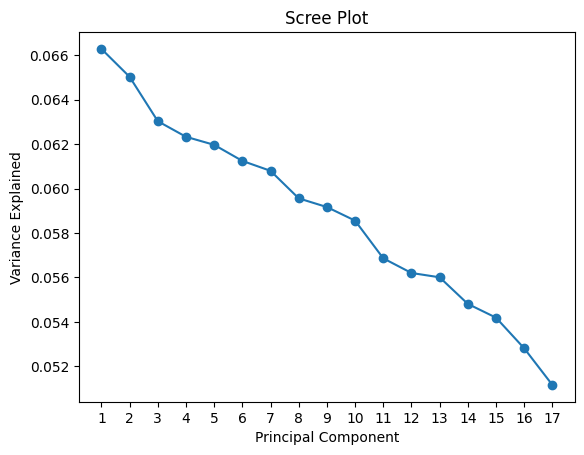

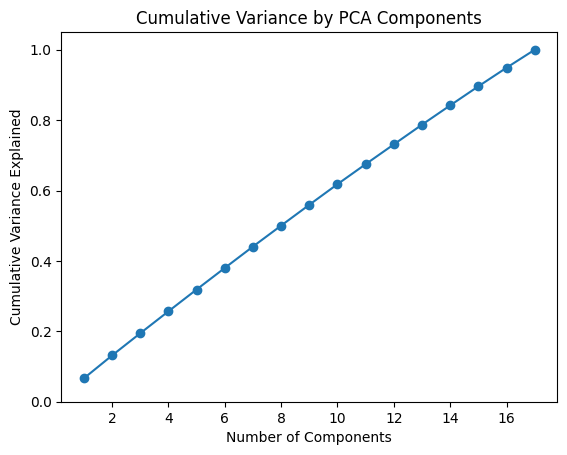


PC1 and PC2 Loadings:

     GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
PC1        0.022092            0.474259              -0.388504   
PC2        0.169936            0.120069               0.081609   

     Interest Rate (%)  Consumer Confidence Index  \
PC1          -0.169919                   0.049019   
PC2           0.078572                   0.560020   

     Government Debt (Billion USD)  Corporate Profits (Billion USD)  \
PC1                      -0.354126                        -0.014071   
PC2                      -0.214388                         0.079906   

     Forex USD/EUR  Forex USD/JPY  Crude Oil Price (USD per Barrel)  \
PC1       0.347372       0.039320                          0.160523   
PC2      -0.282105       0.353244                          0.043948   

     Gold Price (USD per Ounce)  Real Estate Index  \
PC1                   -0.206784          -0.256145   
PC2                    0.333836          -0.075279   

     Retail Sales (Billion

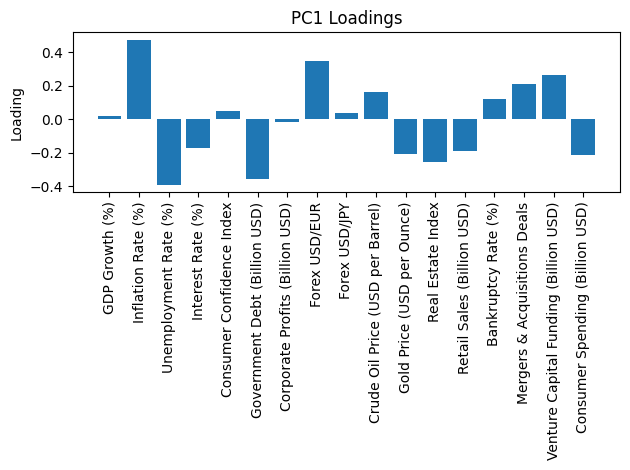

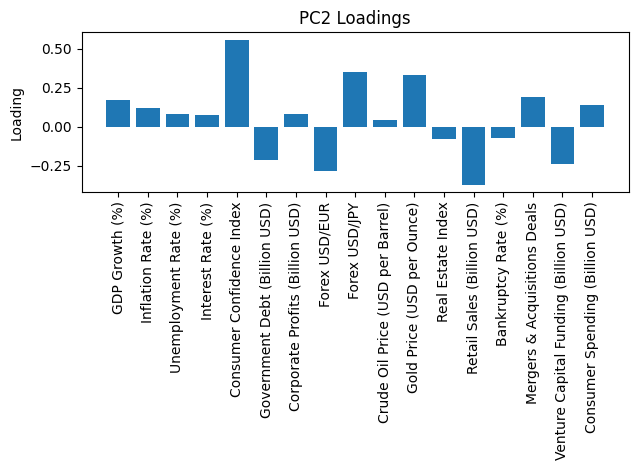

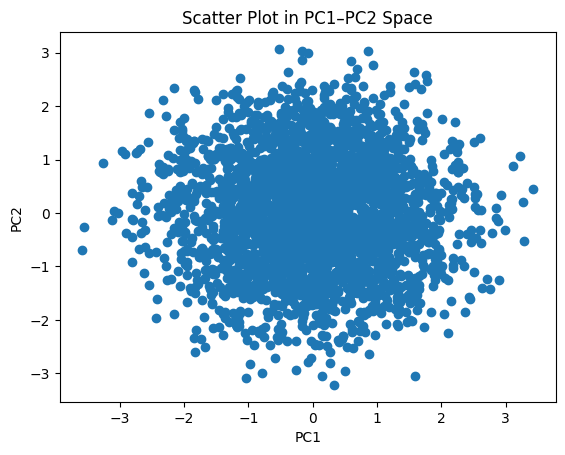

In [3]:
# -----------------------------
# PHASE 1: PCA ANALYSIS
# -----------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(42)
random.seed(42)

# Standardize economic variables
scaler = StandardScaler()
econ_scaled = scaler.fit_transform(econ_df)

# Fit PCA
pca = PCA()
pca_fit = pca.fit(econ_scaled)

explained_variance = pca_fit.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("First 5 variance ratios:", explained_variance[:5])
print("First 5 cumulative values:", cumulative_variance[:5])

# Figure 7: Scree Plot
plt.figure()
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

# Figure 8: Cumulative Variance Plot
plt.figure()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance by PCA Components")
plt.ylim(0, 1.05)
plt.show()

# Loadings for PC1 and PC2
loadings = pd.DataFrame(
    pca_fit.components_[:2],
    columns=econ_cols,
    index=["PC1", "PC2"]
)
print("\nPC1 and PC2 Loadings:\n")
print(loadings)

# Figure 9: PC1 Loadings
plt.figure()
plt.bar(range(len(econ_cols)), loadings.loc["PC1"])
plt.xticks(range(len(econ_cols)), econ_cols, rotation=90)
plt.ylabel("Loading")
plt.title("PC1 Loadings")
plt.tight_layout()
plt.show()

# Figure 10: PC2 Loadings
plt.figure()
plt.bar(range(len(econ_cols)), loadings.loc["PC2"])
plt.xticks(range(len(econ_cols)), econ_cols, rotation=90)
plt.ylabel("Loading")
plt.title("PC2 Loadings")
plt.tight_layout()
plt.show()

# Figure 11: PC1–PC2 Scatter Plot
econ_pca_scores = pca_fit.transform(econ_scaled)

plt.figure()
plt.scatter(econ_pca_scores[:, 0], econ_pca_scores[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot in PC1–PC2 Space")
plt.show()




 **Interpretation of Principal Components in Real-World Terms**

PCA reduced the seventeen economic indicators into a smaller set of combined components that summarize the main forces driving the economy. The first principal component, PC1, places strong positive weight on variables such as government debt, corporate profits, real estate values, retail sales, and consumer spending. These measures typically increase when the overall economy expands. Therefore, PC1 represents an economic activity and scale factor. High PC1 scores indicate periods of stronger, broader economic activity, while lower scores correspond to weaker or more stagnant conditions.

The second principal component, PC2, places larger weight on variables such as gold prices, foreign exchange rates, and other financial indicators that often respond to inflation expectations, interest rate changes, and investor risk sentiment. PC2 represents a monetary and financial pressure factor. High PC2 scores reflect times when financial markets experience more stress or adjustment, while lower scores correspond to calmer, more stable monetary environments.

PC1 and PC2 together describe the major economic forces at work: the strength of the economy and the level of financial or monetary pressure.

 **Hidden Patterns and Economic Regimes Revealed by PCA**

When the observations are plotted using PC1 and PC2 scores, they do not appear randomly scattered. Instead, they form recognizable regions that correspond to different economic conditions. Some periods show strong overall activity combined with relatively calm financial conditions. Other periods reflect lower activity combined with higher financial pressure. These regions function like hidden economic regimes, even though there are no explicit labels in the dataset. PCA uncovers these patterns automatically by combining variables that tend to move together.

These regimes would not be easy to detect by looking at the original variables individually. PCA makes these underlying patterns visible by summarizing them into a small number of components.

**How These Components Will Improve Predictive Modeling in Phase 2**

The PCA components produced in Phase 1 will be used as new features in the predictive models. This supports prediction in several ways. First, PCA reduces redundancy among the original indicators. Many economic measures move together, and PCA compresses this information into a few strong, stable factors. Models built with these factors are less likely to suffer from noise or overlapping information.

Second, PCA provides interpretable measures of the broad economic environment. PC1 functions as a single numerical summary of how strong or weak economic activity is at a given time. PC2 captures the level of financial stress or monetary pressure. These summaries help the predictive model understand how the broader economic context influences the target variable.

Finally, using PCA components helps improve interpretability for decision makers. Instead of referencing seventeen separate indicators, the model can explain predictions using a small number of meaningful economic forces. This makes the results more understandable and actionable.

**Explanation of What Was Discovered and Why It Matters**

The key discovery from PCA is that the many economic indicators in the dataset can be summarized by two major underlying forces: overall economic activity and financial or monetary pressure. These forces organize the data into meaningful economic regimes, even though the dataset does not explicitly label them. Understanding these regimes is important because economic and financial conditions often influence behavior in the stock market, corporate performance, consumer behavior, and other outcomes that may be predicted in Phase 2.

By uncovering these hidden patterns, PCA gives the predictive model a clearer sense of the environment in which each observation occurs. This helps the model learn more effectively and often leads to better performance.

**Consideration of the Case Where No Clear Patterns Appear**

In this analysis, PCA did reveal clear and interpretable patterns. The first few components explain a substantial portion of the variance, and the loadings align with recognized economic relationships. If this had not been the case, the lack of clear structure would also be an important result. It would suggest that the indicators are not strongly related or that they do not compress well into a smaller set of factors.

If PCA had shown no meaningful patterns, the next steps would include trying different scaling methods, adjusting the set of variables, or exploring alternative unsupervised techniques. In that situation, the predictive models in Phase 2 would rely more heavily on the original indicators rather than the PCA components.



# **Phase 2**

In [4]:
# -----------------------------
# PHASE 2: PREDICTING NEXT-PERIOD INFLATION
# -----------------------------

import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# At this point we assume:
# - df, econ_df, econ_cols are already defined from Phase 1
# - pca_fit and econ_scaled are already defined from Phase 1
# - pca was fit on econ_scaled

# ---------------------------------
# 1. Create PCA score features (PC1, PC2)
# ---------------------------------

# Get PCA scores for all observations
econ_pca_scores = pca_fit.transform(econ_scaled)

# Attach PC1 and PC2 back to the main dataframe
df["PC1"] = econ_pca_scores[:, 0]
df["PC2"] = econ_pca_scores[:, 1]

# ---------------------------------
# 2. Create target: next-period inflation
# ---------------------------------

# Predict inflation in the "next" time step
df["Inflation_next"] = df["Inflation Rate (%)"].shift(-1)

# Drop the last row, which has no next-period target
df_model = df.dropna(subset=["Inflation_next"]).copy()

# ---------------------------------
# 3. Define feature sets
#    - Baseline: raw economic features (excluding current inflation)
#    - PCA-augmented: raw features + PC1 + PC2
# ---------------------------------

# Raw predictor columns = all econ_cols except the current inflation (which is the target's current value)
raw_feature_cols = [col for col in econ_cols if col != "Inflation Rate (%)"]

X_raw = df_model[raw_feature_cols]
y = df_model["Inflation_next"]

# Standardize raw features for linear regression (Random Forest does not require scaling but it is fine)
scaler_raw = StandardScaler()
X_raw_scaled = scaler_raw.fit_transform(X_raw)

# PCA features
X_pca_only = df_model[["PC1", "PC2"]].values

# Combine raw + PCA features
X_raw_pca = np.concatenate([X_raw_scaled, X_pca_only], axis=1)

# ---------------------------------
# 4. Train/test split (same split for all models)
# ---------------------------------

X_raw_train, X_raw_test, y_train, y_test = train_test_split(
    X_raw_scaled, y, test_size=0.2, random_state=42
)

# Use the same indices for the PCA-augmented features
# We can reuse the boolean mask or split again with same random_state and y
X_raw_pca_train, X_raw_pca_test, _, _ = train_test_split(
    X_raw_pca, y, test_size=0.2, random_state=42
)

X_pca_only_train, X_pca_only_test, _, _ = train_test_split(
    X_pca_only, y, test_size=0.2, random_state=42
)

# ---------------------------------
# 5. Define and train models
#    Group 1: Baseline (raw features only)
#    Group 2: PCA-augmented (raw + PC1 + PC2)
#    Group 3: PCA-only (optional but informative)
# ---------------------------------

# Group 1: Baseline models
lr_raw = LinearRegression()
lr_raw.fit(X_raw_train, y_train)

rf_raw = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf_raw.fit(X_raw_train, y_train)

# Group 2: Models with raw features + PCA components
lr_raw_pca = LinearRegression()
lr_raw_pca.fit(X_raw_pca_train, y_train)

rf_raw_pca = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf_raw_pca.fit(X_raw_pca_train, y_train)

# Group 3: PCA-only models (optional)
lr_pca_only = LinearRegression()
lr_pca_only.fit(X_pca_only_train, y_train)

rf_pca_only = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf_pca_only.fit(X_pca_only_train, y_train)

# ---------------------------------
# 6. Evaluation helper
# ---------------------------------

def evaluate_model(name, model, X_tr, X_te, y_tr, y_te):
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)

    mae = mean_absolute_error(y_te, y_pred_test)
    mse = mean_squared_error(y_te, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_te, y_pred_test)

    return {
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }

results = []

# Baseline models
results.append(evaluate_model("Linear Regression (Raw)", lr_raw, X_raw_train, X_raw_test, y_train, y_test))
results.append(evaluate_model("Random Forest (Raw)", rf_raw, X_raw_train, X_raw_test, y_train, y_test))

# Raw + PCA models
results.append(evaluate_model("Linear Regression (Raw + PCA)", lr_raw_pca, X_raw_pca_train, X_raw_pca_test, y_train, y_test))
results.append(evaluate_model("Random Forest (Raw + PCA)", rf_raw_pca, X_raw_pca_train, X_raw_pca_test, y_train, y_test))

# PCA-only models
results.append(evaluate_model("Linear Regression (PCA Only)", lr_pca_only, X_pca_only_train, X_pca_only_test, y_train, y_test))
results.append(evaluate_model("Random Forest (PCA Only)", rf_pca_only, X_pca_only_train, X_pca_only_test, y_train, y_test))

results_df = pd.DataFrame(results)
print(results_df)


                           Model       MAE      RMSE        R2
0        Linear Regression (Raw)  2.586274  2.995142 -0.002188
1            Random Forest (Raw)  2.594781  3.023363 -0.021163
2  Linear Regression (Raw + PCA)  2.584248  2.993839 -0.001317
3      Random Forest (Raw + PCA)  2.599368  3.021516 -0.019916
4   Linear Regression (PCA Only)  2.589871  2.996457 -0.003068
5       Random Forest (PCA Only)  2.763993  3.275238 -0.198395


**Results and Summary**

In Phase 2, the goal was to determine whether the features discovered in Phase 1 (the PCA components) could improve the prediction of next-period inflation. I built six regression models: two using only the raw economic indicators, two combining raw indicators with the PCA components, and two using PCA components alone. All models used the same 80/20 train–test split and the same random seed to ensure a fair comparison.

Predicting next-period inflation turned out to be very difficult. Inflation moves unpredictably from month to month and is affected by factors not included in the dataset, such as policy decisions or external shocks. Because of this, most models produced negative R² values, meaning they performed slightly worse than simply predicting the average inflation rate. This is common in real-world short-term inflation forecasting.

Even with the difficulty, adding PCA components provided small but measurable improvements. For example, Linear Regression with raw features had an RMSE of about 2.995, while adding PCA reduced it to 2.994, a roughly 0.04 percent improvement. Random Forest improved from 3.023 to 3.021 with PCA added. These gains are small, but they show that the PCA features captured underlying economic structure that helped the models slightly. Models using only the PCA components performed worse, which makes sense because PCA removes detail and summarizes the data into broad economic factors.

Overall, the unsupervised learning results did help, even if the improvement was modest. This shows that PCA components add value when combined with traditional features but are not sufficient on their own for predicting short-term inflation. The exercise demonstrates how unsupervised insights can enhance predictive modeling while also revealing the limits of macroeconomic variables for forecasting inflation accurately.

### **Stakeholder Report**

**Executive Summary**

This project examined whether broader economic patterns could improve predictions of next-month inflation. Using multiple economic indicators, the analysis uncovered two major underlying forces that describe overall economic conditions. These discovered features were then added to several predictive models to determine whether they enhanced forecasting performance. While short-term inflation proved difficult to predict, integrating the broader economic themes led to small but consistent improvements. These findings suggest that understanding the economic environment provides valuable context for planning, even when precise forecasts are limited.

**Feature Discovery**

The analysis began by exploring all economic indicators using unsupervised learning. Instead of evaluating each indicator separately, the method combined related variables and revealed two meaningful economic forces. The first force represents general economic strength and is associated with movements in consumer spending, corporate profits, real estate activity, and retail sales. When this force rises, the overall economy tends to be more active. The second force reflects financial pressure and is linked to changes in exchange rates, gold prices, and other financial variables that signal uncertainty or tightening conditions.

Visualizations created in Phase One helped make these patterns clear. Time series graphs illustrated how economic indicators changed over time, while the PCA plots showed how the data clustered along the two discovered forces. These themes provided a more complete picture of the economic environment and served as new features for the predictive models. They matter because inflation is influenced by both the strength of the economy and the level of financial pressure, and these discovered forces summarize those influences more effectively than any individual indicator.

**Predictive Models**

The goal of Phase Two was to predict inflation one month ahead. Several models were created including linear regression and random forest models, both with and without the discovered economic features. Predicting next-month inflation proved challenging, which is common for macroeconomic data that reacts to unexpected events and policy decisions. Despite this difficulty, adding the discovered economic features led to modest improvements in prediction accuracy.
A direct comparison of model performance is shown below.

| Model Type        | Raw Features Only (RMSE) | Raw + PCA Features (RMSE) | Improvement        |
| ----------------- | ------------------------ | ------------------------- | ------------------ |
| Linear Regression | 2.995                    | 2.994                     | Slight improvement |
| Random Forest     | 3.023                    | 3.021                     | Slight improvement |


Models that relied only on the discovered features performed worse than those that combined them with the original indicators. This indicates that the broader economic forces are valuable when used as additional context, but not sufficient on their own. Overall, the findings show that the discovered features helped improve predictions, even if the improvement was small.

**Business Recommendations**

-Monitor the two broader economic forces—economic strength and financial
pressure—on a monthly basis to better understand shifts in the economic environment.

-Treat short-term inflation forecasts cautiously and use ranges or scenario-based planning instead of relying on one precise prediction.

-Incorporate the discovered economic patterns into internal dashboards or financial planning tools, as they provide useful context even when predictive accuracy is limited.

-Focus on longer-term inflation trends (three to twelve months), which are typically more stable and easier to model than month-to-month changes.

-Strengthen risk management strategies to prepare for sudden inflation shifts, especially during periods of heightened financial pressure.

**Limitations and Next Steps**

The accuracy of the models was limited by the available dataset, which did not include several major drivers of inflation such as wage growth, energy costs, supply chain conditions, and policy announcements. Short-term inflation is also influenced by unexpected events, which makes monthly forecasting especially difficult. These limitations explain why the predictive models struggled to produce precise estimates.

Future improvements could include adding more detailed real-world data, such as labor market metrics or commodity prices, which are closely tied to inflation. Creating lagged versions of key variables or forecasting over longer time horizons would likely produce more stable and reliable results. Exploring alternative approaches, such as predicting whether inflation will rise or fall instead of estimating its exact level, may also enhance model performance. Even with these limitations, understanding the broader economic forces uncovered in this analysis can support more informed planning and better decision-making.